# Breast Cancer Supervised ML

I will be using 4 classifiers for the breast cancer dataset from the UCI ML repository


Dataset: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 




{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

## Scaler Preprocessing

In [3]:
X_orig = X
X_orig

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [5]:
y['Diagnosis'] = y['Diagnosis'].replace({'M': 1, 'B': 0})
y

/tmp/ipykernel_12509/329757748.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['Diagnosis'] = y['Diagnosis'].replace({'M': 1, 'B': 0})
/tmp/ipykernel_12509/329757748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = y['Diagnosis'].replace({'M': 1, 'B': 0})


,Diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X = scaler.fit_transform(X)

In [7]:
# convert X_orig and y into numpy arrays
X_orig = X_orig.to_numpy()
y = y.to_numpy().ravel()

In [8]:
print(X.shape, y.shape, X_orig.shape)

(569, 30) (569,) (569, 30)


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

## Cross Validation with SVM RBF Kernel

#### Perform 80/20

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [11]:
# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e


# Draw the heatmap of training errors.
def draw_heatmap(training_errors, gamma_list, C_list):
    # training_errors: A NumPy array with the shape (len(C_list), len(gamma_list))
    # gamma_list: List of gamma(s).
    # C_list: List of C(s).
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f',
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel = r'$\gamma$', ylabel=r'$C$')
    plt.title(r'Training error w.r.t $C$ and $\gamma$')
    plt.show()

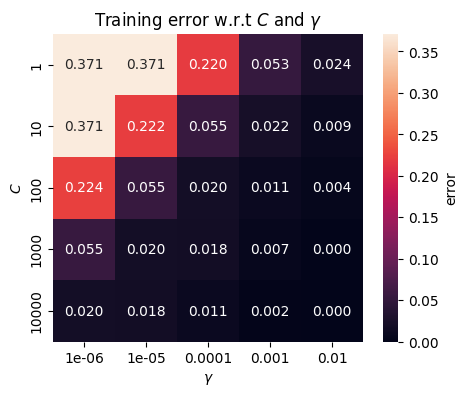

In [12]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3,1e-2]

errs = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        classifier = SVC(C = C, gamma= gamma, kernel = 'rbf')
        classifier.fit(X_train, y_train)
        errs[i,j] = calc_error(X_train, y_train, classifier)

draw_heatmap(errs, gamma_list, C_list)

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': C_list,
    'gamma': gamma_list,
    'kernel': ['rbf']
}

grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters for 80/20 split:", grid_search.best_params_)

# 1. Training accuracy: Accuracy on training data
svm_train_a = grid_search.score(X_train, y_train)
print("Training Accuracy for 80/20 split:", svm_train_a)

# 2. Validation accuracy: Best cross-validation score
svm_val_a = grid_search.best_score_
print("Validation Accuracy for 80/20 split (from CV):", svm_val_a)

# 3. Test accuracy: Accuracy on test data
y_pred = grid_search.predict(X_test)
svm_test_a = accuracy_score(y_test, y_pred)
print("Test Accuracy for 80/20 split:", svm_test_a)

Best Hyperparameters for 80/20 split: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Training Accuracy for 80/20 split: 0.9824175824175824
Validation Accuracy for 80/20 split (from CV): 0.9780219780219781
Test Accuracy for 80/20 split: 0.9736842105263158


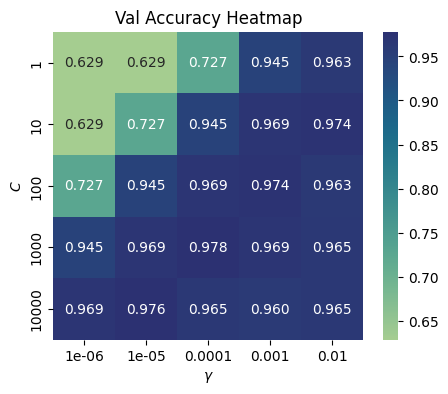

In [14]:
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results into a 2D matrix of test accuracies for each combination of C and gamma
# Use keyword arguments for pivot
test_scores_matrix = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(5, 4))
ax = sns.heatmap(test_scores_matrix, annot=True, fmt='.3f',
                 xticklabels=gamma_list, yticklabels=C_list, cmap = 'crest')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$C$')
plt.title('Val Accuracy Heatmap')
plt.show()


#### Perform 50/50

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Check the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (284, 30)
X_test shape: (285, 30)
y_train shape: (284,)
y_test shape: (285,)


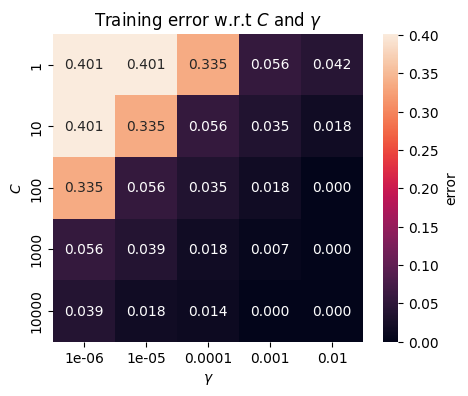

In [16]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3,1e-2]

errs = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        classifier = SVC(C = C, gamma= gamma, kernel = 'rbf')
        classifier.fit(X_train, y_train)
        errs[i,j] = calc_error(X_train, y_train, classifier)

draw_heatmap(errs, gamma_list, C_list)

In [17]:
param_grid = {
    'C': C_list,
    'gamma': gamma_list,
    'kernel': ['rbf']
}

grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
print("Best Hyperparameters for 50/50 split:", grid_search.best_params_)

# 1. Training accuracy: Accuracy on training data
svm_train_b = grid_search.score(X_train, y_train)
print("Training Accuracy for 50/50 split:", svm_train_b)

# 2. Validation accuracy: Best cross-validation score
svm_val_b = grid_search.best_score_
print("Validation Accuracy for 50/50 split (from CV):", svm_val_b)

# 3. Test accuracy: Accuracy on test data
y_pred = grid_search.predict(X_test)
svm_test_b = accuracy_score(y_test, y_pred)
print("Test Accuracy for 50/50 split:", svm_test_b)

Best Hyperparameters for 50/50 split: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Training Accuracy for 50/50 split: 0.9823943661971831
Validation Accuracy for 50/50 split (from CV): 0.9753759398496239
Test Accuracy for 50/50 split: 0.9824561403508771


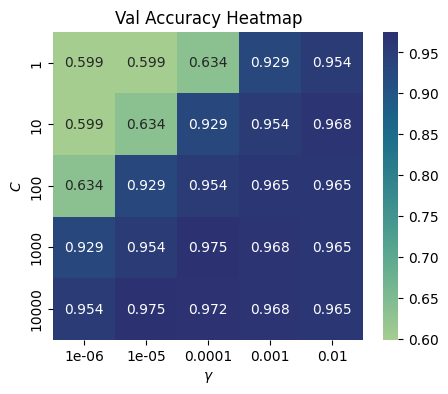

In [18]:
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results into a 2D matrix of test accuracies for each combination of C and gamma
# Use keyword arguments for pivot
test_scores_matrix = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(5, 4))
ax = sns.heatmap(test_scores_matrix, annot=True, fmt='.3f',
                 xticklabels=gamma_list, yticklabels=C_list, cmap = 'crest')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$C$')
plt.title('Val Accuracy Heatmap')
plt.show()

## Perform 20/80

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Check the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (113, 30)
X_test shape: (456, 30)
y_train shape: (113,)
y_test shape: (456,)


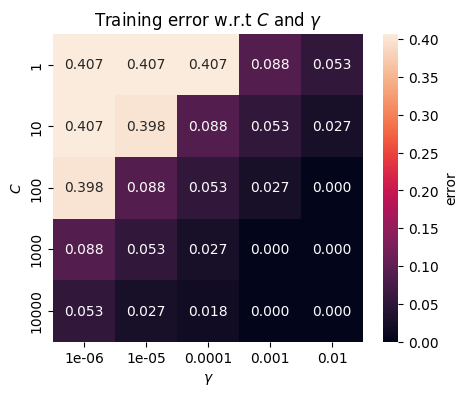

In [20]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3,1e-2]

errs = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        classifier = SVC(C = C, gamma= gamma, kernel = 'rbf')
        classifier.fit(X_train, y_train)
        errs[i,j] = calc_error(X_train, y_train, classifier)

draw_heatmap(errs, gamma_list, C_list)

In [21]:
param_grid = {
    'C': C_list,
    'gamma': gamma_list,
    'kernel': ['rbf']
}

grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
print("Best Hyperparameters for 20/80 split:", grid_search.best_params_)

# 1. Training accuracy: Accuracy on training data
svm_train_c = grid_search.score(X_train, y_train)
print("Training Accuracy for 20/80 split:", svm_train_c)

# 2. Validation accuracy: Best cross-validation score
svm_val_c = grid_search.best_score_
print("Validation Accuracy for 20/80 split (from CV):", svm_val_c)

# 3. Test accuracy: Accuracy on test data
y_pred = grid_search.predict(X_test)
svm_test_c = accuracy_score(y_test, y_pred)
print("Test Accuracy for 20/80 split:", svm_test_c)

Best Hyperparameters for 20/80 split: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Training Accuracy for 20/80 split: 0.9734513274336283
Validation Accuracy for 20/80 split (from CV): 0.9553359683794467
Test Accuracy for 20/80 split: 0.9758771929824561


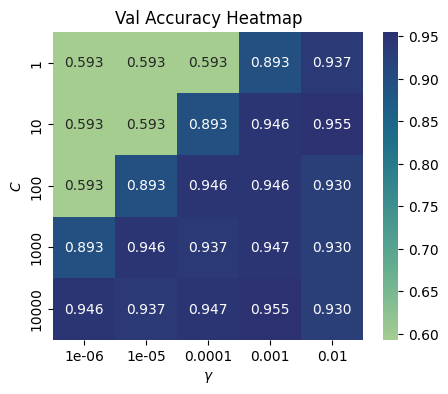

In [22]:
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results into a 2D matrix of test accuracies for each combination of C and gamma
# Use keyword arguments for pivot
test_scores_matrix = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(5, 4))
ax = sns.heatmap(test_scores_matrix, annot=True, fmt='.3f',
                 xticklabels=gamma_list, yticklabels=C_list, cmap = 'crest')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$C$')
plt.title('Val Accuracy Heatmap')
plt.show()

# Average Accuracies from SVM rbf kernel

In [23]:
svm_avg_train = (svm_train_a + svm_train_b + svm_train_c)/3
print("Average Training Accuracy: ", svm_avg_train)

svm_avg_val = (svm_val_a + svm_val_b + svm_val_c)/3
print("Average Validation Accuracy: ", svm_avg_val)

svm_avg_test = (svm_test_a + svm_test_b + svm_test_c)/3
print("Average Test Accuracy: ", svm_avg_test)

Average Training Accuracy:  0.9794210920161314
Average Validation Accuracy:  0.969577962083683
Average Test Accuracy:  0.9773391812865496


## Cross Validation Logistic Regression

#### 80/20

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


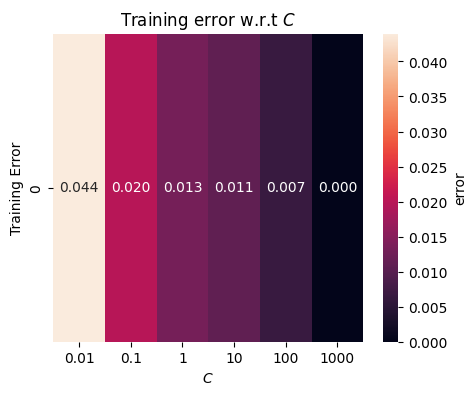

In [25]:

# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e

# Draw the heatmap of training errors.
def draw_heatmap(training_errors, C_list):
    # training_errors: A NumPy array with the shape (len(C_list))
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(training_errors.reshape(1, -1), annot=True, fmt='.3f',
                     xticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel = r'$C$', ylabel='Training Error')
    plt.title(r'Training error w.r.t $C$')
    plt.show()

C_list = [0.01, 0.1, 1, 10, 100, 1000]

# Create a list to store the training errors for each C.
errs = np.zeros(len(C_list))

# Loop through each C value, train Logistic Regression and calculate error.
for i, C in enumerate(C_list):
    classifier = LogisticRegression(C=C, max_iter=100000)
    classifier.fit(X_train, y_train)
    errs[i] = calc_error(X_train, y_train, classifier)

# Draw the heatmap.
draw_heatmap(errs, C_list)

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': C_list
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000000), param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters for 80/20 split:", grid_search.best_params_)

# Get the best model
best_log_reg = grid_search.best_estimator_

# Re-evaluate the best model
y_train_pred_best = best_log_reg.predict(X_train)
logtrain_a = accuracy_score(y_train, y_train_pred_best)

y_test_pred_best = best_log_reg.predict(X_test)
logtest_a = accuracy_score(y_test, y_test_pred_best)
cv_results_a = grid_search.cv_results_
logcv_a = grid_search.best_score_

print(f"Training Accuracy (Best Model): {logtrain_a}")
print(f"Best Validation Accuracy: {logcv_a:.4f}")
print(f"Test Accuracy (Best Model): {logtest_a}")

Best Hyperparameters for 80/20 split: {'C': 1}
Training Accuracy (Best Model): 0.9868131868131869
Best Validation Accuracy: 0.9758
Test Accuracy (Best Model): 0.9736842105263158


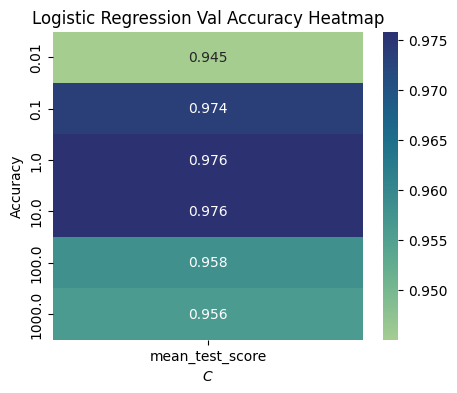

In [27]:
# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results into a 2D matrix of test scores for each combination of C
test_scores_matrix = results.pivot_table(index='param_C', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(test_scores_matrix, annot=True, fmt='.3f', cmap='crest')
plt.xlabel(r'$C$')  # Label for the x-axis (regularization parameter 'C')
plt.ylabel('Accuracy')  # Label for the y-axis (accuracy score)
plt.title('Logistic Regression Val Accuracy Heatmap')  # Title of the plot
plt.show()

#### 50/50

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Check the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (284, 30)
X_test shape: (285, 30)
y_train shape: (284,)
y_test shape: (285,)


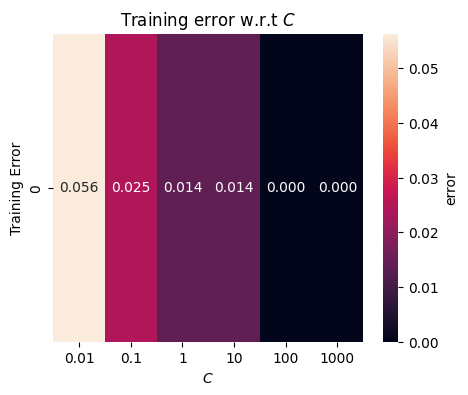

In [29]:
C_list = [0.01, 0.1, 1, 10, 100, 1000]

# Create a list to store the training errors for each C.
errs = np.zeros(len(C_list))

# Loop through each C value, train Logistic Regression and calculate error.
for i, C in enumerate(C_list):
    classifier = LogisticRegression(C=C, max_iter=100000)
    classifier.fit(X_train, y_train)
    errs[i] = calc_error(X_train, y_train, classifier)

# Draw the heatmap.
draw_heatmap(errs, C_list)

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': C_list
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000000), param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters for 50/50 split:", grid_search.best_params_)

# Get the best model
best_log_reg = grid_search.best_estimator_

# Re-evaluate the best model
y_train_pred_best = best_log_reg.predict(X_train)
logtrain_b = accuracy_score(y_train, y_train_pred_best)

y_test_pred_best = best_log_reg.predict(X_test)
logtest_b = accuracy_score(y_test, y_test_pred_best)
cv_results_b = grid_search.cv_results_
logcv_b = grid_search.best_score_

print(f"Training Accuracy (Best Model): {logtrain_b}")
print(f"Best Validation Accuracy: {logcv_b:.4f}")
print(f"Test Accuracy (Best Model): {logtest_b}")

Best Hyperparameters for 50/50 split: {'C': 1}
Training Accuracy (Best Model): 0.9859154929577465
Best Validation Accuracy: 0.9754
Test Accuracy (Best Model): 0.9859649122807017


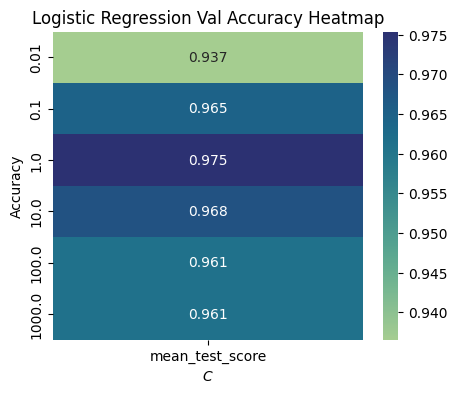

In [31]:
# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results into a 2D matrix of test scores for each combination of C
test_scores_matrix = results.pivot_table(index='param_C', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(test_scores_matrix, annot=True, fmt='.3f', cmap='crest')
plt.xlabel(r'$C$')  # Label for the x-axis (regularization parameter 'C')
plt.ylabel('Accuracy')  # Label for the y-axis (accuracy score)
plt.title('Logistic Regression Val Accuracy Heatmap')  # Title of the plot
plt.show()

#### 20/80

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Check the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (113, 30)
X_test shape: (456, 30)
y_train shape: (113,)
y_test shape: (456,)


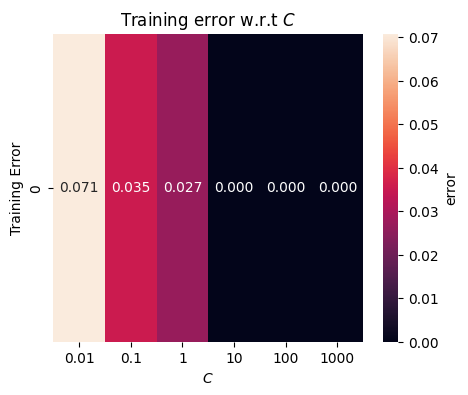

In [33]:
C_list = [0.01, 0.1, 1, 10, 100, 1000]

# Create a list to store the training errors for each C.
errs = np.zeros(len(C_list))

# Loop through each C value, train Logistic Regression and calculate error.
for i, C in enumerate(C_list):
    classifier = LogisticRegression(C=C, max_iter=100000)
    classifier.fit(X_train, y_train)
    errs[i] = calc_error(X_train, y_train, classifier)

# Draw the heatmap.
draw_heatmap(errs, C_list)

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': C_list
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000000), param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters for 20/80 split:", grid_search.best_params_)

# Get the best model
best_log_reg = grid_search.best_estimator_

# Re-evaluate the best model
y_train_pred_best = best_log_reg.predict(X_train)
logtrain_c = accuracy_score(y_train, y_train_pred_best)

y_test_pred_best = best_log_reg.predict(X_test)
logtest_c = accuracy_score(y_test, y_test_pred_best)
cv_results_c = grid_search.cv_results_
logcv_c = grid_search.best_score_

print(f"Training Accuracy (Best Model): {logtrain_c}")
print(f"Best Validation Accuracy: {logcv_c:.4f}")
print(f"Test Accuracy (Best Model): {logtest_c}")

Best Hyperparameters for 20/80 split: {'C': 1}
Training Accuracy (Best Model): 0.9734513274336283
Best Validation Accuracy: 0.9644
Test Accuracy (Best Model): 0.9758771929824561


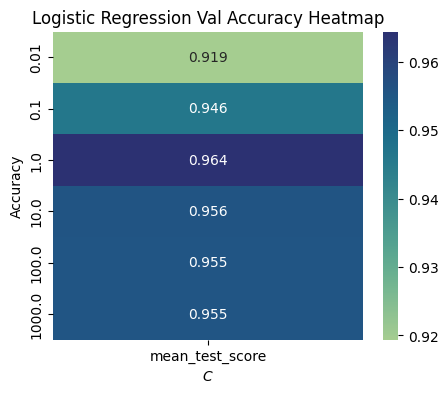

In [35]:
# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results into a 2D matrix of test scores for each combination of C
test_scores_matrix = results.pivot_table(index='param_C', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(test_scores_matrix, annot=True, fmt='.3f', cmap='crest')
plt.xlabel(r'$C$')  # Label for the x-axis (regularization parameter 'C')
plt.ylabel('Accuracy')  # Label for the y-axis (accuracy score)
plt.title('Logistic Regression Val Accuracy Heatmap')  # Title of the plot
plt.show()

### Average Accuracies

In [36]:
logavg_train = (logtrain_a + logtrain_b + logtrain_c)/3
print("Average Training Accuracy: ", logavg_train)

logavg_val = (logcv_a + logcv_b + logcv_c)/3
print("Average Validation Accuracy: ", logavg_val)

logavg_test = (logtest_a + logtest_b + logtest_c)/3
print("Average Test Accuracy: ", logavg_test)

Average Training Accuracy:  0.9820600024015205
Average Validation Accuracy:  0.9718756643813853
Average Test Accuracy:  0.9785087719298247


## Perform Decision Tree

#### 80/20

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y, test_size=0.2, random_state=42)

# Check the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


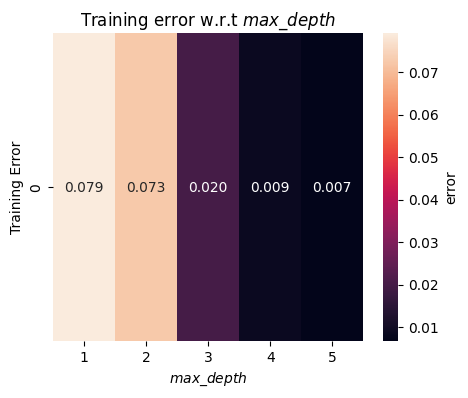

In [38]:
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e

# Function to draw the heatmap of training errors.
def draw_heatmap(training_errors, D_list):
    # training_errors: A NumPy array with the shape (len(D_list))
    plt.figure(figsize=(5, 4))
    ax = sns.heatmap(training_errors.reshape(1, -1), annot=True, fmt='.3f',
                     xticklabels=D_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel=r'$max\_depth$', ylabel='Training Error')
    plt.title(r'Training error w.r.t $max\_depth$')
    plt.show()

# List of depths to try
D_list = [1, 2, 3, 4, 5]

# Create a list to store the training errors for each max_depth.
errs = np.zeros(len(D_list))

# Loop through each max_depth value, train Decision Tree Classifier and calculate error.
for i, D in enumerate(D_list):
    classifier = DecisionTreeClassifier(max_depth=D, criterion="entropy")
    classifier.fit(X_train, y_train)
    errs[i] = calc_error(X_train, y_train, classifier)

# Draw the heatmap.
draw_heatmap(errs, D_list)

Best Hyperparameters for 80/20 split: {'max_depth': 3}
Training Accuracy (Best Model): 0.9802197802197802
Best Validation Accuracy: 0.9407
Test Accuracy (Best Model): 0.9649122807017544


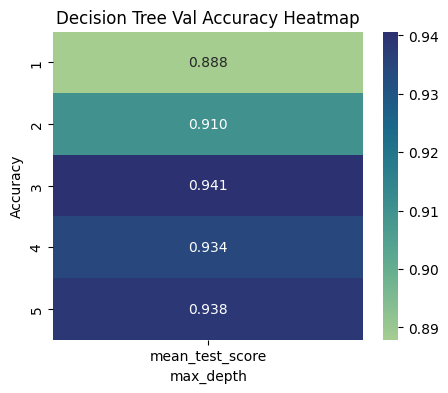

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': D_list
}

grid_search = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters for 80/20 split:", grid_search.best_params_)

# Get the best model
best_dt = grid_search.best_estimator_

# Re-evaluate the best model
y_train_pred_best = best_dt.predict(X_train)
dttrain_a= accuracy_score(y_train, y_train_pred_best)

y_test_pred_best = best_dt.predict(X_test)
dttest_a = accuracy_score(y_test, y_test_pred_best)
cv_results_a = grid_search.cv_results_
dtcv_a = grid_search.best_score_

print(f"Training Accuracy (Best Model): {dttrain_a}")
print(f"Best Validation Accuracy: {dtcv_a:.4f}")
print(f"Test Accuracy (Best Model): {dttest_a}")


# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results into a 2D matrix of test scores for each combination of D
test_scores_matrix = results.pivot_table(index='param_max_depth', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(test_scores_matrix, annot=True, fmt='.3f', cmap='crest')
plt.xlabel(r'max_depth')  # Label for the x-axis (regularization parameter 'D')
plt.ylabel('Accuracy')  # Label for the y-axis (accuracy score)
plt.title('Decision Tree Val Accuracy Heatmap')  # Title of the plot
plt.show()

## Perform 50/50

X_train shape: (284, 30)
X_test shape: (285, 30)
y_train shape: (284,)
y_test shape: (285,)


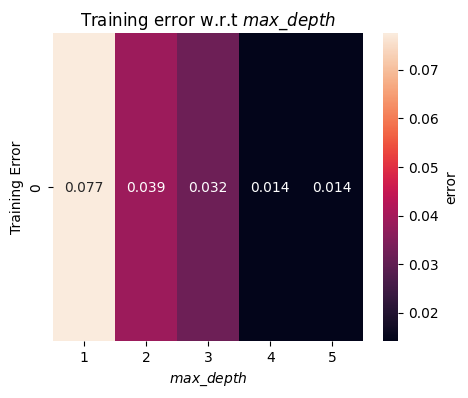

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y, test_size=0.5, random_state=42)

# Check the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# List of depths to try
D_list = [1, 2, 3, 4, 5]

# Create a list to store the training errors for each max_depth.
errs = np.zeros(len(D_list))

# Loop through each max_depth value, train Decision Tree Classifier and calculate error.
for i, D in enumerate(D_list):
    classifier = DecisionTreeClassifier(max_depth=D, criterion="entropy")
    classifier.fit(X_train, y_train)
    errs[i] = calc_error(X_train, y_train, classifier)

# Draw the heatmap.
draw_heatmap(errs, D_list)

Best Hyperparameters for 50/50 split: {'max_depth': 4}
Training Accuracy (Best Model): 0.9859154929577465
Best Validation Accuracy: 0.9189
Test Accuracy (Best Model): 0.9368421052631579


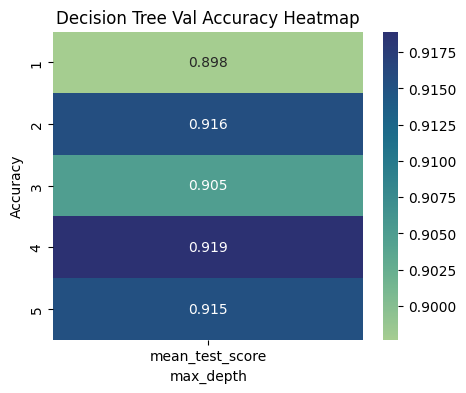

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': D_list
}

grid_search = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters for 50/50 split:", grid_search.best_params_)

# Get the best model
best_dt = grid_search.best_estimator_

# Re-evaluate the best model
y_train_pred_best = best_dt.predict(X_train)
dttrain_b= accuracy_score(y_train, y_train_pred_best)

y_test_pred_best = best_dt.predict(X_test)
dttest_b = accuracy_score(y_test, y_test_pred_best)
cv_results_b = grid_search.cv_results_
dtcv_b= grid_search.best_score_

print(f"Training Accuracy (Best Model): {dttrain_b}")
print(f"Best Validation Accuracy: {dtcv_b:.4f}")
print(f"Test Accuracy (Best Model): {dttest_b}")


# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results into a 2D matrix of test scores for each combination of D
test_scores_matrix = results.pivot_table(index='param_max_depth', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(test_scores_matrix, annot=True, fmt='.3f', cmap='crest')
plt.xlabel(r'max_depth')  # Label for the x-axis (regularization parameter 'D')
plt.ylabel('Accuracy')  # Label for the y-axis (accuracy score)
plt.title('Decision Tree Val Accuracy Heatmap')  # Title of the plot
plt.show()

### Perform 20/80

X_train shape: (113, 30)
X_test shape: (456, 30)
y_train shape: (113,)
y_test shape: (456,)


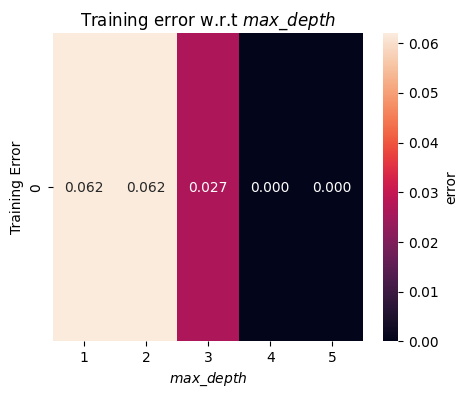

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y, test_size=0.8, random_state=42)

# Check the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# List of depths to try
D_list = [1, 2, 3, 4, 5]

# Create a list to store the training errors for each max_depth.
errs = np.zeros(len(D_list))

# Loop through each max_depth value, train Decision Tree Classifier and calculate error.
for i, D in enumerate(D_list):
    classifier = DecisionTreeClassifier(max_depth=D, criterion="entropy")
    classifier.fit(X_train, y_train)
    errs[i] = calc_error(X_train, y_train, classifier)

# Draw the heatmap.
draw_heatmap(errs, D_list)

Best Hyperparameters for 20/80 split: {'max_depth': 1}
Training Accuracy (Best Model): 0.9380530973451328
Best Validation Accuracy: 0.9115
Test Accuracy (Best Model): 0.9078947368421053


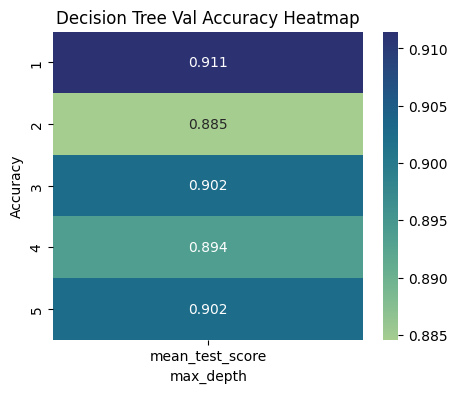

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': D_list
}

grid_search = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters for 20/80 split:", grid_search.best_params_)

# Get the best model
best_dt = grid_search.best_estimator_

# Re-evaluate the best model
y_train_pred_best = best_dt.predict(X_train)
dttrain_c= accuracy_score(y_train, y_train_pred_best)

y_test_pred_best = best_dt.predict(X_test)
dttest_c = accuracy_score(y_test, y_test_pred_best)
cv_results_c = grid_search.cv_results_
dtcv_c= grid_search.best_score_

print(f"Training Accuracy (Best Model): {dttrain_c}")
print(f"Best Validation Accuracy: {dtcv_c:.4f}")
print(f"Test Accuracy (Best Model): {dttest_c}")


# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Reshape the results into a 2D matrix of test scores for each combination of D
test_scores_matrix = results.pivot_table(index='param_max_depth', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(test_scores_matrix, annot=True, fmt='.3f', cmap='crest')
plt.xlabel(r'max_depth')  # Label for the x-axis (regularization parameter 'D')
plt.ylabel('Accuracy')  # Label for the y-axis (accuracy score)
plt.title('Decision Tree Val Accuracy Heatmap')  # Title of the plot
plt.show()

### Average Accuracies for Decision Tree

In [44]:
dtavg_train = (dttrain_a + dttrain_b + dttrain_c)/3
print("Average Training Accuracy: ", dtavg_train)

dtavg_val = (dtcv_a + dtcv_b + dtcv_c)/3
print("Average Validation Accuracy: ", dtavg_val)

dtavg_test = (dttest_a + dttest_b + dttest_c)/3
print("Average Test Accuracy: ", dtavg_test)

Average Training Accuracy:  0.9680627901742199
Average Validation Accuracy:  0.9236813656722124
Average Test Accuracy:  0.9365497076023392


## K Nearest Neighbor

#### 80/20

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


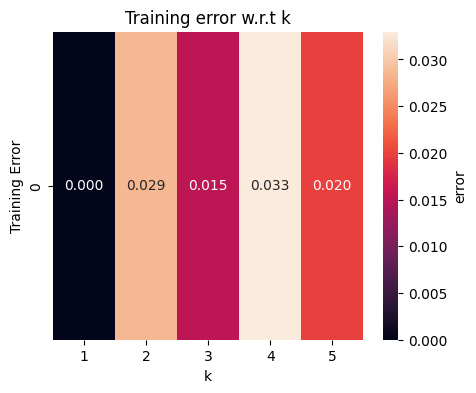

In [46]:
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e

# Function to draw the heatmap of training errors.
def draw_heatmap(training_errors, k_list):
    # training_errors: A NumPy array with the shape (len(k_list))
    plt.figure(figsize=(5, 4))
    ax = sns.heatmap(training_errors.reshape(1, -1), annot=True, fmt='.3f',
                     xticklabels=D_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel=r'k', ylabel='Training Error')
    plt.title(r'Training error w.r.t k')
    plt.show()

# List of depths to try
k_list = [1, 2, 3, 4, 5]

# Create a list to store the training errors for each max_depth.
errs = np.zeros(len(k_list))

# Loop through each max_depth value, train Decision Tree Classifier and calculate error.
for i, K in enumerate(k_list):
    classifier = KNeighborsClassifier(n_neighbors= K)
    classifier.fit(X_train, y_train)
    errs[i] = calc_error(X_train, y_train, classifier)

# Draw the heatmap.
draw_heatmap(errs, k_list)

Best Hyperparameters for 80/20 split: {'n_neighbors': 5}
Training Accuracy (Best Model): 0.8945054945054945
Best Validation Accuracy: 0.9604
Test Accuracy (Best Model): 0.9210526315789473


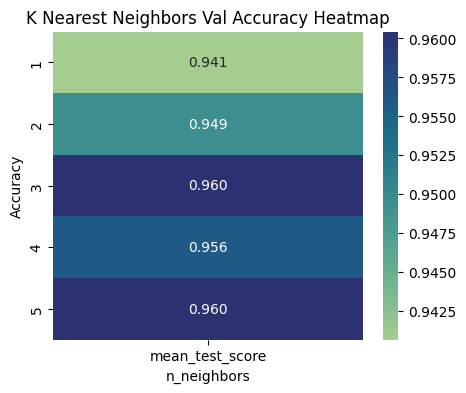

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': k_list
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters for 80/20 split:", grid_search.best_params_)

# Get the best model
best_kn = grid_search.best_estimator_

# Re-evaluate the best model
y_train_pred_best = best_dt.predict(X_train)
knntrain_a= accuracy_score(y_train, y_train_pred_best)

y_test_pred_best = best_dt.predict(X_test)
knntest_a = accuracy_score(y_test, y_test_pred_best)
cv_results_a = grid_search.cv_results_
knncv_a = grid_search.best_score_

print(f"Training Accuracy (Best Model): {knntrain_a}")
print(f"Best Validation Accuracy: {knncv_a:.4f}")
print(f"Test Accuracy (Best Model): {knntest_a}")


# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)


test_scores_matrix = results.pivot_table(index='param_n_neighbors', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(test_scores_matrix, annot=True, fmt='.3f', cmap='crest')
plt.xlabel(r'n_neighbors')  
plt.ylabel('Accuracy')  # Label for the y-axis (accuracy score)
plt.title('K Nearest Neighbors Val Accuracy Heatmap')  # Title of the plot
plt.show()

### 50/50

X_train shape: (284, 30)
X_test shape: (285, 30)
y_train shape: (284,)
y_test shape: (285,)


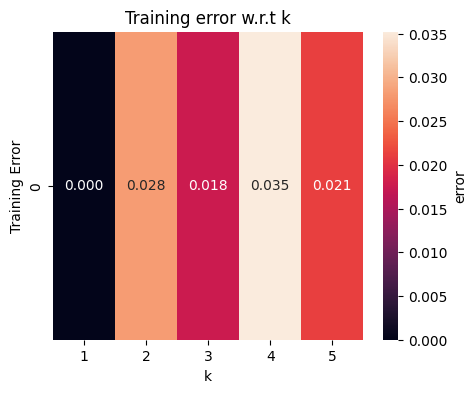

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Check the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# List of depths to try
k_list = [1, 2, 3, 4, 5]

# Create a list to store the training errors for each max_depth.
errs = np.zeros(len(k_list))

# Loop through each max_depth value, train Decision Tree Classifier and calculate error.
for i, K in enumerate(k_list):
    classifier = KNeighborsClassifier(n_neighbors= K)
    classifier.fit(X_train, y_train)
    errs[i] = calc_error(X_train, y_train, classifier)

# Draw the heatmap.
draw_heatmap(errs, k_list)

Best Hyperparameters for 50/50 split: {'n_neighbors': 5}
Training Accuracy (Best Model): 0.8943661971830986
Best Validation Accuracy: 0.9718
Test Accuracy (Best Model): 0.9052631578947369


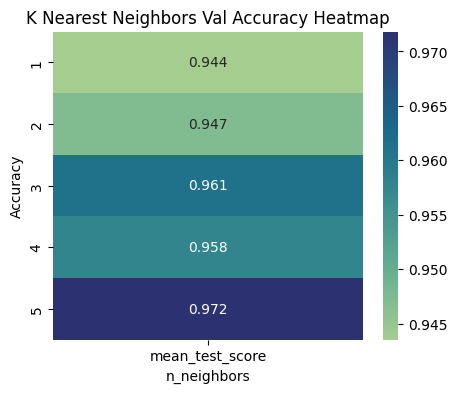

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': k_list
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters for 50/50 split:", grid_search.best_params_)

# Get the best model
best_kn = grid_search.best_estimator_

# Re-evaluate the best model
y_train_pred_best = best_dt.predict(X_train)
knntrain_b= accuracy_score(y_train, y_train_pred_best)

y_test_pred_best = best_dt.predict(X_test)
knntest_b = accuracy_score(y_test, y_test_pred_best)
cv_results_b = grid_search.cv_results_
knncv_b = grid_search.best_score_

print(f"Training Accuracy (Best Model): {knntrain_b}")
print(f"Best Validation Accuracy: {knncv_b:.4f}")
print(f"Test Accuracy (Best Model): {knntest_b}")


# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)


test_scores_matrix = results.pivot_table(index='param_n_neighbors', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(test_scores_matrix, annot=True, fmt='.3f', cmap='crest')
plt.xlabel(r'n_neighbors')  
plt.ylabel('Accuracy')  # Label for the y-axis (accuracy score)
plt.title('K Nearest Neighbors Val Accuracy Heatmap')  # Title of the plot
plt.show()

## 20/80

X_train shape: (113, 30)
X_test shape: (456, 30)
y_train shape: (113,)
y_test shape: (456,)


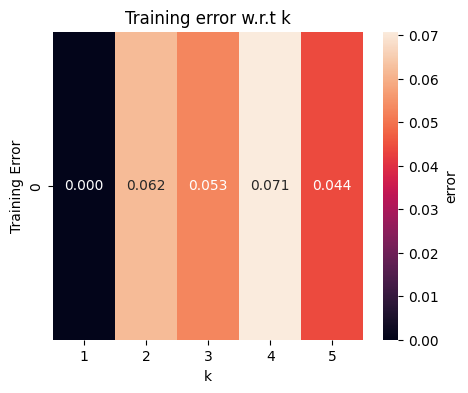

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Check the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# List of depths to try
k_list = [1, 2, 3, 4, 5]

# Create a list to store the training errors for each max_depth.
errs = np.zeros(len(k_list))

# Loop through each max_depth value, train Decision Tree Classifier and calculate error.
for i, K in enumerate(k_list):
    classifier = KNeighborsClassifier(n_neighbors= K)
    classifier.fit(X_train, y_train)
    errs[i] = calc_error(X_train, y_train, classifier)

# Draw the heatmap.
draw_heatmap(errs, k_list)

Best Hyperparameters for 20/80 split: {'n_neighbors': 5}
Training Accuracy (Best Model): 0.911504424778761
Best Validation Accuracy: 0.9379
Test Accuracy (Best Model): 0.8969298245614035


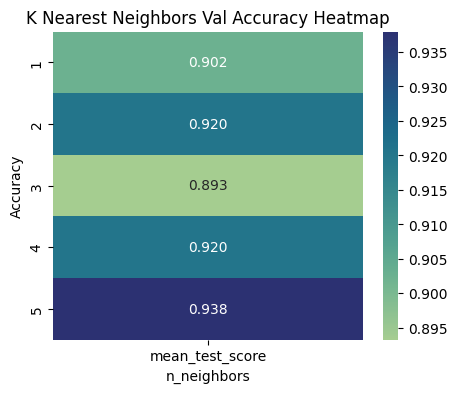

In [51]:

param_grid = {
    'n_neighbors': k_list
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters for 20/80 split:", grid_search.best_params_)

# Get the best model
best_kn = grid_search.best_estimator_

# Re-evaluate the best model
y_train_pred_best = best_dt.predict(X_train)
knntrain_c= accuracy_score(y_train, y_train_pred_best)

y_test_pred_best = best_dt.predict(X_test)
knntest_c = accuracy_score(y_test, y_test_pred_best)
cv_results_c = grid_search.cv_results_
knncv_c = grid_search.best_score_

print(f"Training Accuracy (Best Model): {knntrain_c}")
print(f"Best Validation Accuracy: {knncv_c:.4f}")
print(f"Test Accuracy (Best Model): {knntest_c}")


# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)


test_scores_matrix = results.pivot_table(index='param_n_neighbors', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(test_scores_matrix, annot=True, fmt='.3f', cmap='crest')
plt.xlabel(r'n_neighbors')  
plt.ylabel('Accuracy')  # Label for the y-axis (accuracy score)
plt.title('K Nearest Neighbors Val Accuracy Heatmap')  # Title of the plot
plt.show()

### Average Accuracies for KNN

In [52]:
knn_avg_train = (knntrain_a + knntrain_b + knntrain_c)/3
print("Average Training Accuracy: ", knn_avg_train)

knn_avg_val = (knncv_a + knncv_b + knncv_c)/3
print("Average Validation Accuracy: ", knn_avg_val)

knn_avg_test = (knntest_a + knntest_b + knntest_c)/3
print("Average Test Accuracy: ", knn_avg_test)

Average Training Accuracy:  0.9001253721557848
Average Validation Accuracy:  0.9567295785831256
Average Test Accuracy:  0.907748538011696


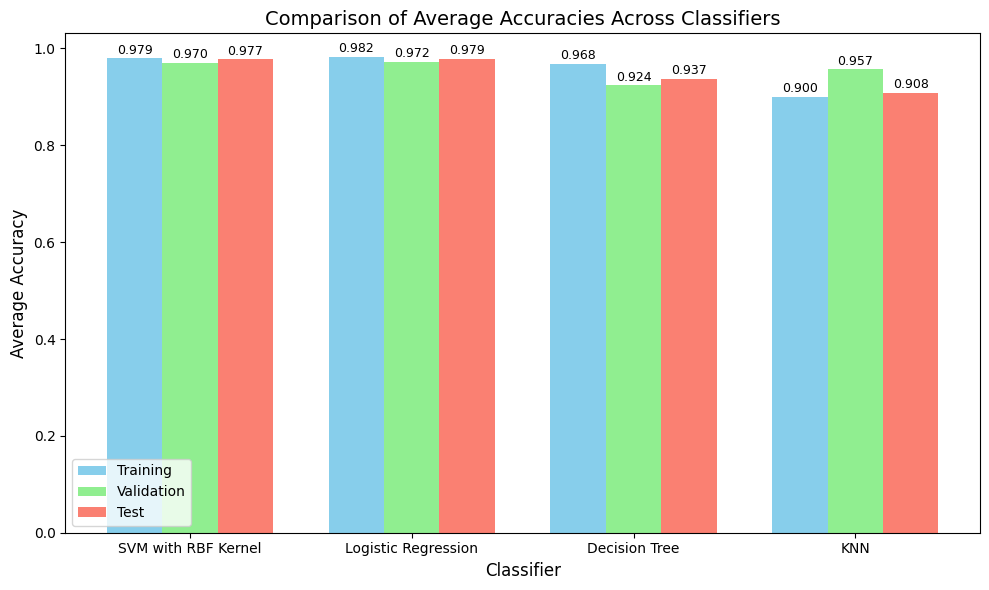

In [53]:
# Define the classifier names
classifiers = ['SVM with RBF Kernel','Logistic Regression', 'Decision Tree', 'KNN']

# Define the average accuracies for training, validation, and test
avg_train_accuracies = [svm_avg_train, logavg_train, dtavg_train, knn_avg_train]
avg_val_accuracies = [svm_avg_val, logavg_val, dtavg_val, knn_avg_val]
avg_test_accuracies = [svm_avg_test, logavg_test, dtavg_test, knn_avg_test]

# Set the x positions for the bars
x = np.arange(len(classifiers))  # Positions for classifiers

# Define the bar width
bar_width = 0.25

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each group of bars
plt.bar(x - bar_width, avg_train_accuracies, width=bar_width, label='Training', color='skyblue')
plt.bar(x, avg_val_accuracies, width=bar_width, label='Validation', color='lightgreen')
plt.bar(x + bar_width, avg_test_accuracies, width=bar_width, label='Test', color='salmon')

# Add labels and title
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=12)
plt.title('Comparison of Average Accuracies Across Classifiers', fontsize=14)
plt.xticks(x, classifiers)  # Set classifier names as x-axis labels

# Add a legend
plt.legend()

# Annotate the bar heights
for i, acc_list in enumerate([avg_train_accuracies, avg_val_accuracies, avg_test_accuracies]):
    for j, acc in enumerate(acc_list):
        offset = [-bar_width, 0, bar_width][i]  # Adjust annotation position for grouped bars
        plt.text(x[j] + offset, acc + 0.01, f'{acc:.3f}', ha='center', fontsize=9)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

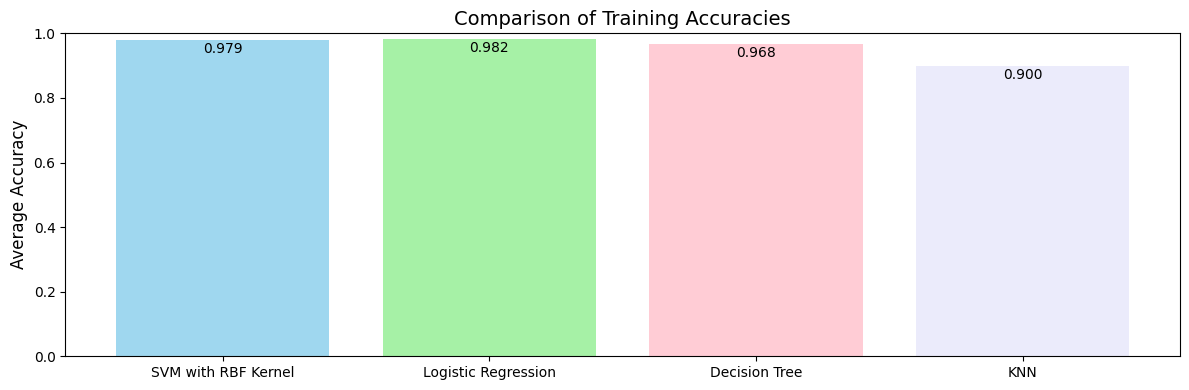

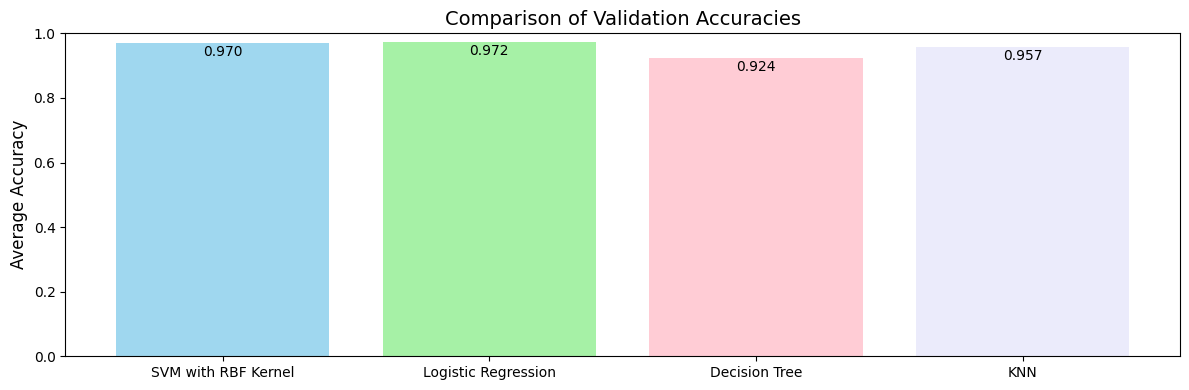

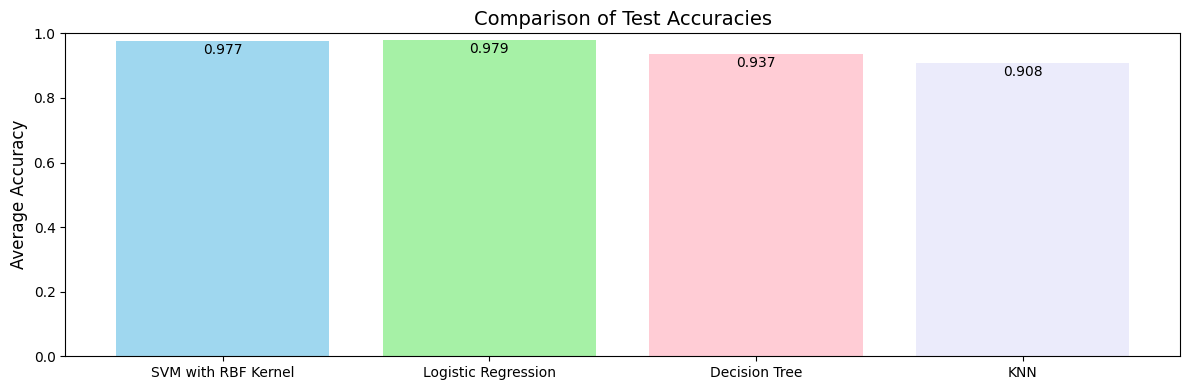

In [54]:
colors = ['skyblue', 'lightgreen', 'pink', 'lavender']

# Define a function to plot a single bar chart
def plot_accuracy_chart(title, accuracies, ylabel='Average Accuracy'):
    plt.figure(figsize=(12, 4))
    bars = plt.bar(classifiers, accuracies, color=colors, alpha=0.8)
    plt.title(title, fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.ylim(0, 1)  # Assuming accuracy values range from 0 to 1
    # Annotate the bars
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.04, 
                 f'{acc:.3f}', ha='center', fontsize=10)
    plt.tight_layout()
    plt.show()

# Plot training accuracy
plot_accuracy_chart('Comparison of Training Accuracies', avg_train_accuracies)

# Plot validation accuracy
plot_accuracy_chart('Comparison of Validation Accuracies', avg_val_accuracies)

# Plot test accuracy
plot_accuracy_chart('Comparison of Test Accuracies', avg_test_accuracies)